In [1]:
import os
import unicodedata
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.ft2font import FT2Font

In [2]:
def print_glyphs(path=None):
    """
    Print the all glyphs in the given font file to stdout.
    
    Parameters
    ----------
    path : str or None
        The path to the font file.  If None, use Matplotlib's default font.
    """
    if path is None:
        path = fm.findfont(fm.FontProperties()) # the default font
    
    font = FT2Font(path)
    
    charmap = font.get_charmap()
    max_indices_len = len(str(max(charmap.values())))
    
    print("the font face contains the following glyphs:")
    for char_code, glyph_index in charmap.items():
        char = chr(char_code)
        name = unicodedata.name(char, f"{char_code:#x} ({font.get_glyph_name(glyph_index)})")
        print(f"{glyph_index:>{max_indices_len}} {char} {name}")

In [3]:
def draw_font_table(path=None):
    """
    Draw a font table of the first 255 chars of the given font.
    
    Parameters
    ----------
    path : str or None
        The path to the font file.  If None, use Matplotlib's default font.
    """
    if path is None:
        path = fm.findfont(fm.FontProperties()) # the default font
    
    font = FT2Font(path)
    # A charmap is a mapping of "character codes" (in the sense of a character
    # encoding, e.g. latin-1) to glyph indices (i.e. the internal storage table
    # of the font face).
    # In FreeType>=2.1, a Unicode charmap (i.e. mapping Unicode codepoints)
    # is selected by default.  Moreover, recent versions of FreeType will
    # automatically synthesize such a charmap if the font does not include one
    # (this behavior depends on the font format; for example it is present
    # since FreeType 2.0 for Type 1 fonts but only since FreeType 2.8 for
    # TrueType (actually, SFNT) fonts).
    # The code below (specifically, the ``chr(char_code)`` call) assumes that
    # we have indeed selected a Unicode charmap.
    codes = font.get_charmap().items()
    
    labelc = [f"{i:X}" for i in range(16)]
    labelr = [f"{16 * i:02X}" for i in range(16)]
    chars = [["" for c in range(16)] for r in range(16)]
    
    for char_code, glyph_index in codes:
        if char_code >= 256:
            continue
        row, col = divmod(char_code, 16)
        chars[row][col] = chr(char_code)
    
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.set_title(os.path.basename(path))
    ax.set_axis_off()
    
    table = ax.table(
        cellText=chars, rowLabels=labelr, colLabels=labelc, rowColours=["palegreen"] * 16,
        colColours=["palegreen"] * 16, cellLoc="center", loc="upper left",
        cellColours=[["0.95" for _ in range(16)] for _ in range(16)],
    )
    
    for key, cell in table.get_celld().items():
        row, col = key
        if row > 0 and col > -1: # beware of table's idiosyncratic indexing...
            cell.set_text_props(font=Path(path))
    
    fig.tight_layout()
    plt.show()

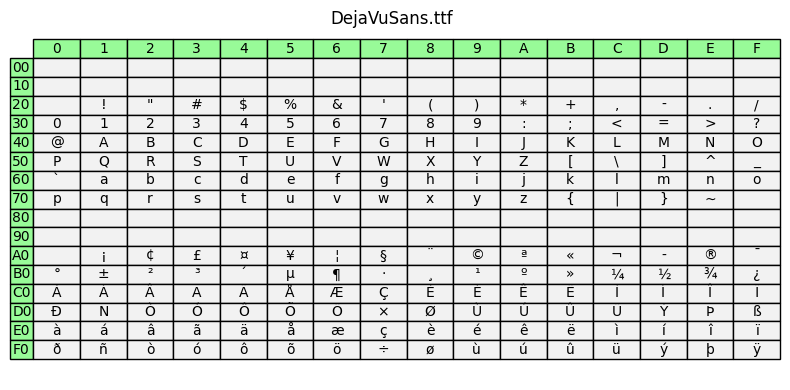

In [4]:
draw_font_table()

In [5]:
# for making cli runner

# if __name__ == "__main__":
#     from argparse import ArgumentParser

#     parser = ArgumentParser(description="Display a font table.")
#     parser.add_argument("path", nargs="?", help="Path to the font file.")
#     parser.add_argument("--print-all", action="store_true",
#                         help="Additionally, print all chars to stdout.")
#     args = parser.parse_args()

#     if args.print_all:
#         print_glyphs(args.path)
#     draw_font_table(args.path)